<a href="https://colab.research.google.com/github/Mughal72/DSA-W.app-Chat-Analysis/blob/main/DSA_W_app_Chat_Analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Getting Started**
Libraries Required
numpy
pandas
matplotlib
seaborn
wordcloud
emoji
jovian (optional)
Install all the above libraries using the command :

## pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade **bold text**

In [ ]:
!pip install numpy pandas matplotlib seaborn wordcloud emoji jovian --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Import packages**

In [ ]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
from collections import Counter

# WhatsApp Chat Data


* Open WhatsApp
* Open a Group/Inbox
* Click on the 3 dotted options button
* Click on More
* Click on Export Chat   
* Click on without media (we are analyzing only text messages here)
Export via Email/other IM's/....

Download to your system, rename to chat.txt and put it in a folder. **bold text**




# **Data Processing**

In [ ]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%m/%d/%y, %I:%M %p - ',
        '24hr' : '%m/%d/%y, %H:%M - ',
        'custom': ''
    }
    
    with open(file, 'r', encoding="utf8") as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

# **Import Data**

In [ ]:
df = rawToDf('/content/chat-data.txt', '12hr')

In [ ]:
df.tail()

,date_time,user,msg
739,2022-11-12 17:45:00,+92 308 1868110,
740,2022-11-12 19:24:00,+92 308 1868110,I need some ideas how i can increase my WhatsA...
741,2022-11-13 08:17:00,grp_notif,+92 309 4132645 changed to +92 318 4081473
742,2022-11-13 10:22:00,+92 308 1868110,*FREE ONLINE INTERNSHIP IN KMPG AUSTRALIA*🇦🇺 ...
743,2022-11-13 19:24:00,+92 308 1868110,Mayry pass University Of Padua ki complete App...


In [ ]:
# no. of msgs
df.shape

(744, 3)

In [ ]:
me = "+92 308 1868110"

# **Data Cleaning**

Let's delete the messages having media. We can see above the media part is omitted.

In [ ]:
media = df[df['msg']==" "] #no. of images, images are represented by 
media.shape

(0, 3)

In [ ]:
df["user"].unique()

array(['grp_notif', '+92 308 1868110'], dtype=object)

In [ ]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(440, 3)

In [ ]:
df.drop(media.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True) #removing grp_notif

In [ ]:
df.tail()

,date_time,user,msg
736,2022-11-12 10:32:00,+92 308 1868110,"Jin logon nay msgs kiye huway thay CV ,SOP or ..."
739,2022-11-12 17:45:00,+92 308 1868110,
740,2022-11-12 19:24:00,+92 308 1868110,I need some ideas how i can increase my WhatsA...
742,2022-11-13 10:22:00,+92 308 1868110,*FREE ONLINE INTERNSHIP IN KMPG AUSTRALIA*🇦🇺 ...
743,2022-11-13 19:24:00,+92 308 1868110,Mayry pass University Of Padua ki complete App...


In [ ]:
df.reset_index(inplace=True, drop=True)
df.shape

(304, 3)

# Let's Answer Some Questions

# Q. Who are the least active and most active persons in the group? **bold text** **bold text**

In [ ]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
+92 308 1868110    304
Name: msg, dtype: int64

# **Q. What does my WhatsApp activity tell about my sleep cycle?**

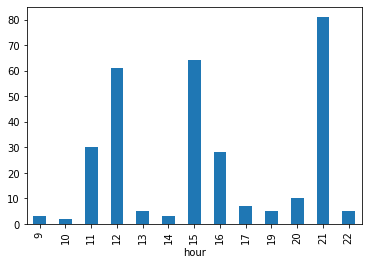

In [ ]:
df['hour'] = df['date_time'].apply(lambda x: x.hour)
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

# **Let's take Week Days and Weekends into consideration**
# **Q. How many words do I type on average on weekday vs weekend?**

In [ ]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name()) # can use day_name or weekday from datetime 

In [ ]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [ ]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user

+92 308 1868110    304
Name: user, dtype: int64

**Who are the top 5 message senders?**

In [ ]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['+92 308 1868110']

In [ ]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,weekday,is_weekend
0,2021-09-05 12:13:00,+92 308 1868110,,Sunday,True
1,2021-09-05 15:18:00,+92 308 1868110,Agr ap Punjab sy hen or ap ka *CGPA 3 h* degre...,Sunday,True
2,2021-09-05 21:13:00,+92 308 1868110,,Sunday,True
3,2021-09-06 12:09:00,+92 308 1868110,*Very Easy Scholarship In Turkey* 🇹🇷🇹🇷🇹🇷 *KA...,Monday,False
4,2021-09-06 15:36:00,+92 308 1868110,"Sb programs available hen Master's,Bachelor's ...",Monday,False


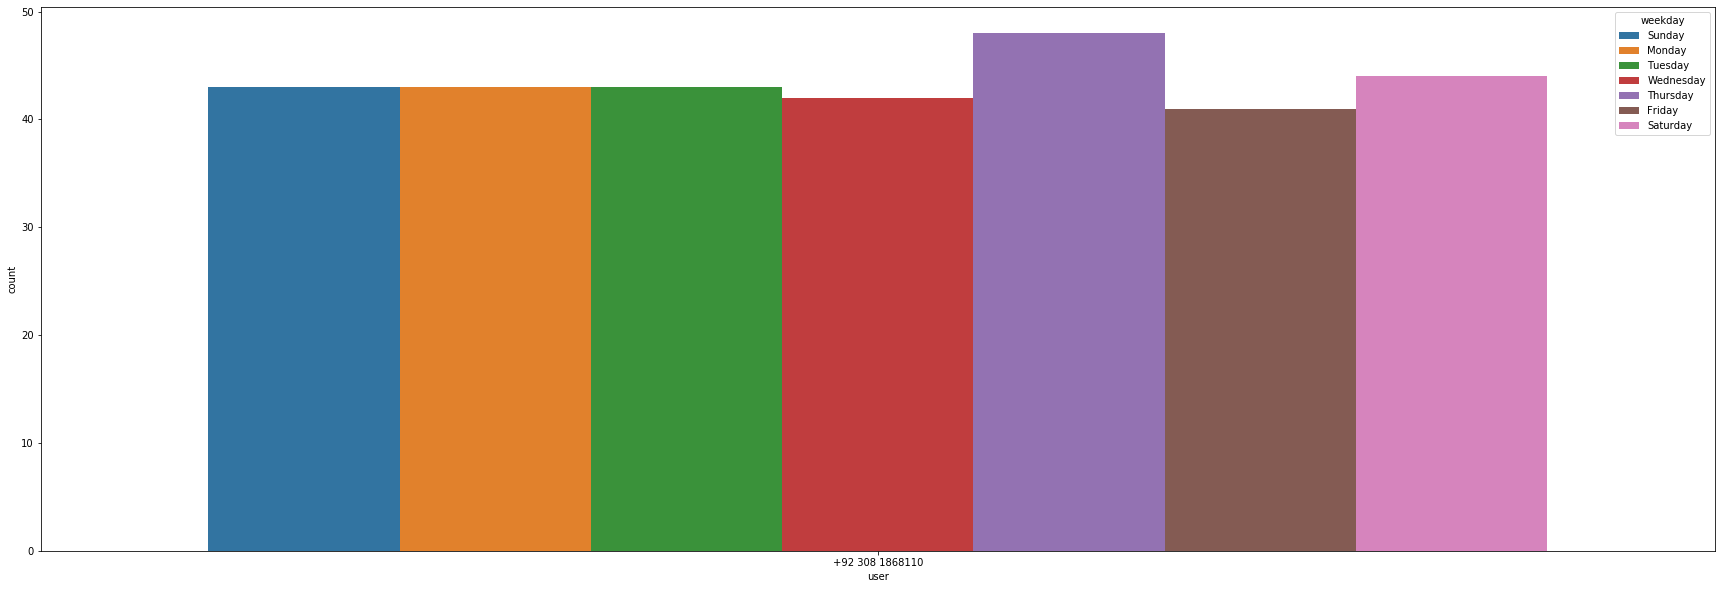

In [ ]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df)

In [ ]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])

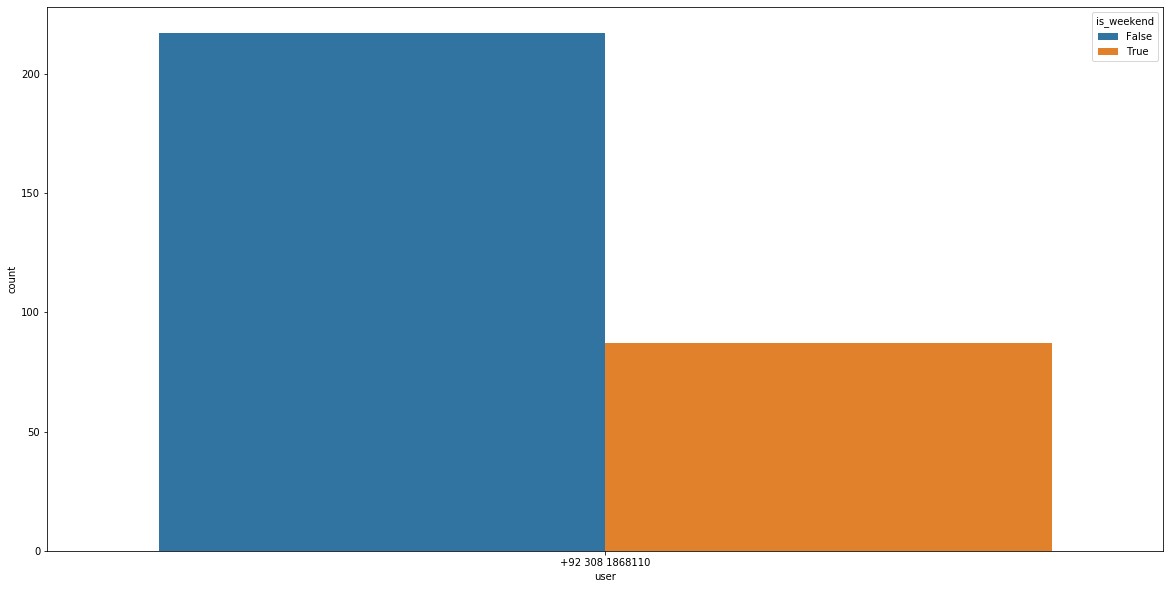

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)

In [ ]:
def word_count(val):
    return len(val.split())

In [ ]:
df['no_of_words'] = df['msg'].apply(word_count)

In [ ]:
df_top5['no_of_words'] = df_top5['msg'].apply(word_count)

**Total words used in Weekdays**

In [ ]:
total_words_weekday = df[df['is_weekend']==False]['no_of_words'].sum()
total_words_weekday

4652

**Total words used in Weekends**

In [ ]:
total_words_weekend = df[df['is_weekend']]['no_of_words'].sum()
total_words_weekend

1649

In [ ]:
# average words on a weekday
total_words_weekday/5 

930.4

In [ ]:
# average words on a weekend
total_words_weekend/2 

824.5

**Number of words used by users in descending orde**

In [ ]:
df.groupby('user')['no_of_words'].sum().sort_values(ascending=False)

user
+92 308 1868110    6301
Name: no_of_words, dtype: int64

In [ ]:
(df_top5.groupby('user')['no_of_words'].sum()/df_top5.groupby('user').size()).sort_values(ascending=False)

user
+92 308 1868110    20.726974
dtype: float64

In [ ]:
wordPerMsg_weekday_vs_weekend = (df_top5.groupby(['user', 'is_weekend'])['no_of_words'].sum()/df_top5.groupby(['user', 'is_weekend']).size())
wordPerMsg_weekday_vs_weekend

user             is_weekend
+92 308 1868110  False         21.437788
                 True          18.954023
dtype: float64

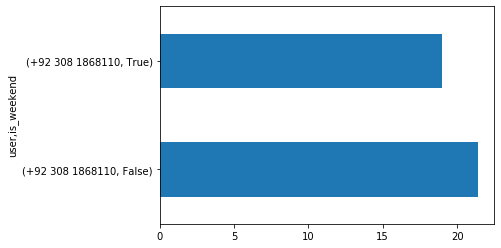

In [ ]:
wordPerMsg_weekday_vs_weekend.plot(kind='barh')

# **Q. At what time of day do I use WhatsApp most?**

In [ ]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
9,1.0,NaN,NaN,NaN,1.0,1.0,NaN
10,NaN,NaN,1.0,1.0,NaN,NaN,NaN
11,5.0,6.0,2.0,2.0,6.0,5.0,4.0
12,6.0,8.0,12.0,12.0,6.0,8.0,9.0
13,1.0,1.0,NaN,NaN,2.0,NaN,1.0


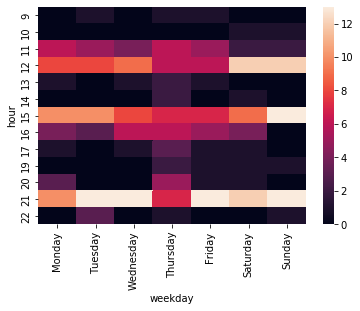

In [ ]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

# **Let's know whom did I respond the most in the group?**

In [ ]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [ ]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 24

In [ ]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(304, 6)

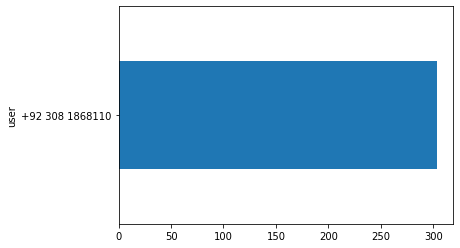

In [ ]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

In [ ]:
comment_words = ' '
# stopwords = STOPWORDS.update([])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
#                 stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

# **Now, I will create a Word Cloud for our WhatsApp Group Chat Analysis, to see what the group is based on. A Word Cloud is a graph of words which shows the most used words by representing the most used words bigger than the rest:**

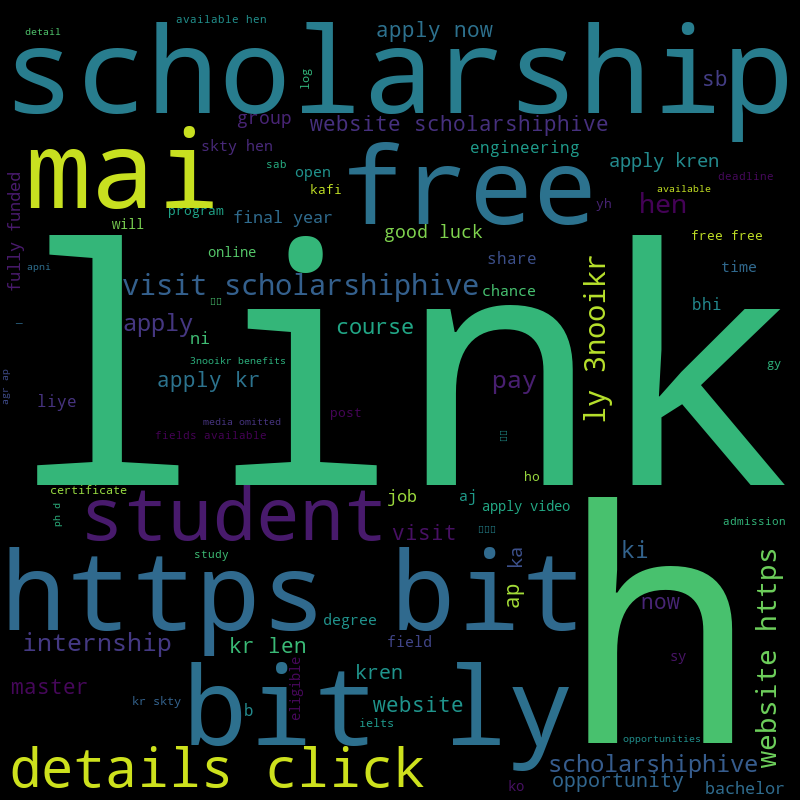

In [ ]:
wordcloud.to_image()

In [ ]:
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 3.9 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
